In [55]:
import pandas as pd  # For using DataFrames
import matplotlib.pyplot as plt # for data visualization
import seaborn as sbs # for advanced data visualization
import numpy as np # for numerical operations

In [56]:
car_df = pd.read_csv('Cars Data.csv') # load the dataset

In [57]:
car_df.head() # display the first few rows of the dataset

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [58]:
car_df.tail() # display the last rows of the dataset

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [59]:
car_df.info() # displays data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [60]:
car_df.select_dtypes(include='object').nunique() # displays unique values for string data type

Make           38
Model         425
Type            6
Origin          3
DriveTrain      3
MSRP          410
Invoice       425
dtype: int64

In [61]:
car_df.drop(columns = ['Make', 'Model', 'Type', 'MSRP', 'Invoice'], inplace = True)

In [62]:
car_df = pd.get_dummies(car_df, columns=["Origin", "DriveTrain"], dtype=int) # converts str to int64

In [63]:
car_df

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,3.5,6.0,265,17,23,4451,106,189,1,0,0,1,0,0
1,2.0,4.0,200,24,31,2778,101,172,1,0,0,0,1,0
2,2.4,4.0,200,22,29,3230,105,183,1,0,0,0,1,0
3,3.2,6.0,270,20,28,3575,108,186,1,0,0,0,1,0
4,3.5,6.0,225,18,24,3880,115,197,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2.4,5.0,197,21,28,3450,105,186,0,1,0,0,1,0
424,2.3,5.0,242,20,26,3450,105,186,0,1,0,0,1,0
425,2.9,6.0,268,19,26,3653,110,190,0,1,0,0,1,0
426,1.9,4.0,170,22,29,2822,101,180,0,1,0,0,1,0


In [64]:
correlations = car_df.corr() # shows correlations of each columns

In [65]:
correlations

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
EngineSize,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448,-0.292006,0.005606,0.291407,0.203412,-0.399261,0.264899
Cylinders,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783,-0.303543,0.175291,0.140514,0.138196,-0.418497,0.349386
Horsepower,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554,-0.268485,0.318696,-0.030870,0.140110,-0.450279,0.382689
MPG_City,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526,0.285385,-0.161311,-0.136292,-0.308283,0.443929,-0.217343
MPG_Highway,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092,0.189742,-0.092505,-0.104667,-0.399313,0.490821,-0.185340
Weight,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021,-0.260983,0.086089,0.183181,0.409600,-0.375765,0.044230
Wheelbase,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195,-0.208991,-0.130575,0.336823,0.166349,-0.191589,0.062494
Length,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000,-0.189131,-0.200000,0.382803,0.080780,-0.089696,0.026532
Origin_Asia,-0.292006,-0.303543,-0.268485,0.285385,0.189742,-0.260983,-0.208991,-0.189131,1.000000,-0.485791,-0.553289,0.000441,0.151006,-0.172924
Origin_Europe,0.005606,0.175291,0.318696,-0.161311,-0.092505,0.086089,-0.130575,-0.200000,-0.485791,1.000000,-0.459312,0.120163,-0.289049,0.217251


In [66]:
correlations = car_df.corr()["MPG_Highway"]  # shows correlations of each columns with the target

In [67]:
correlations

EngineSize         -0.717302
Cylinders          -0.676100
Horsepower         -0.647195
MPG_City            0.941021
MPG_Highway         1.000000
Weight             -0.790989
Wheelbase          -0.524661
Length             -0.466092
Origin_Asia         0.189742
Origin_Europe      -0.092505
Origin_USA         -0.104667
DriveTrain_All     -0.399313
DriveTrain_Front    0.490821
DriveTrain_Rear    -0.185340
Name: MPG_Highway, dtype: float64

In [68]:
car_df.drop(columns = ["MPG_City", "Length", "Wheelbase", "Origin_Asia", "Origin_Europe", "Origin_USA", 
                       "DriveTrain_All", "DriveTrain_Front", "DriveTrain_Rear"], inplace = True) #

In [69]:
car_df

,EngineSize,Cylinders,Horsepower,MPG_Highway,Weight
0,3.5,6.0,265,23,4451
1,2.0,4.0,200,31,2778
2,2.4,4.0,200,29,3230
3,3.2,6.0,270,28,3575
4,3.5,6.0,225,24,3880
...,...,...,...,...,...
423,2.4,5.0,197,28,3450
424,2.3,5.0,242,26,3450
425,2.9,6.0,268,26,3653
426,1.9,4.0,170,29,2822


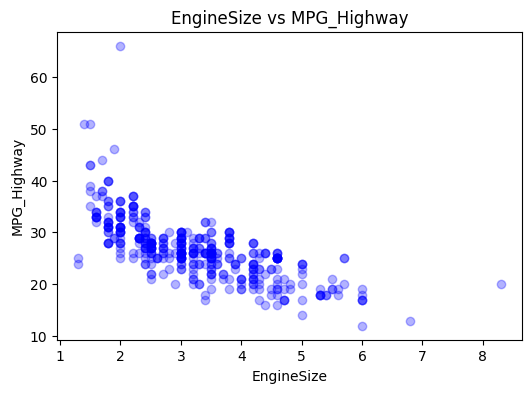

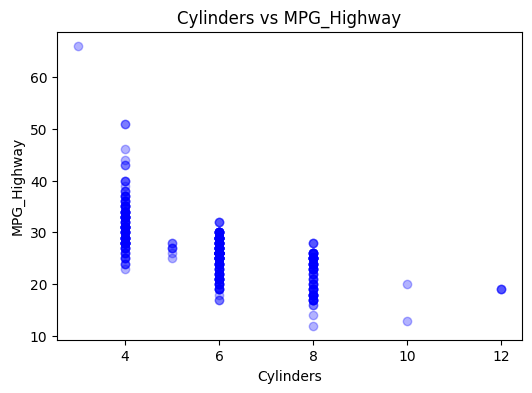

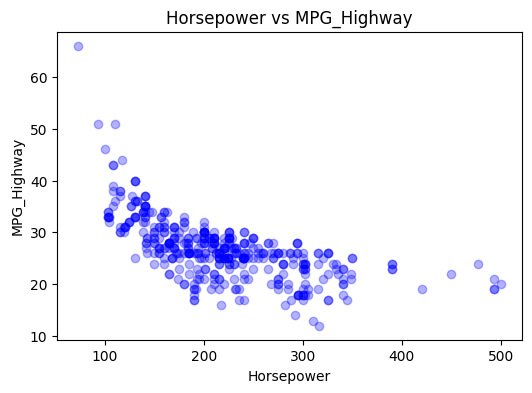

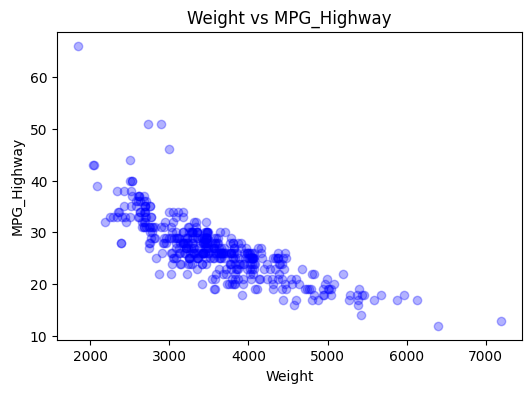

In [70]:
for col in car_df.columns: # plots a graph for every feature with the target
    if col != "MPG_Highway":
        plt.figure(figsize=(6, 4))
        plt.scatter(car_df[col], car_df["MPG_Highway"], alpha=0.3, color = 'blue')
        plt.title(f"{col} vs MPG_Highway")
        plt.xlabel(col)
        plt.ylabel("MPG_Highway")
        plt.show()

In [71]:
car_df.isnull().sum() # check for null(missing) values

EngineSize     0
Cylinders      2
Horsepower     0
MPG_Highway    0
Weight         0
dtype: int64

In [72]:
car_df['Cylinders']= car_df['Cylinders'].fillna(car_df['Cylinders'].mean())

In [73]:
car_df.isnull().sum()

EngineSize     0
Cylinders      0
Horsepower     0
MPG_Highway    0
Weight         0
dtype: int64

In [74]:
car_df.describe() # display statistics of dataset information

,EngineSize,Cylinders,Horsepower,MPG_Highway,Weight
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,26.843458,3577.953271
std,1.108595,1.554789,71.836032,5.741201,758.983215
min,1.300000,3.000000,73.000000,12.000000,1850.000000
25%,2.375000,4.000000,165.000000,24.000000,3104.000000
50%,3.000000,6.000000,210.000000,26.000000,3474.500000
75%,3.900000,6.000000,255.000000,29.000000,3977.750000
max,8.300000,12.000000,500.000000,66.000000,7190.000000


In [75]:
pp_df = car_df.copy()

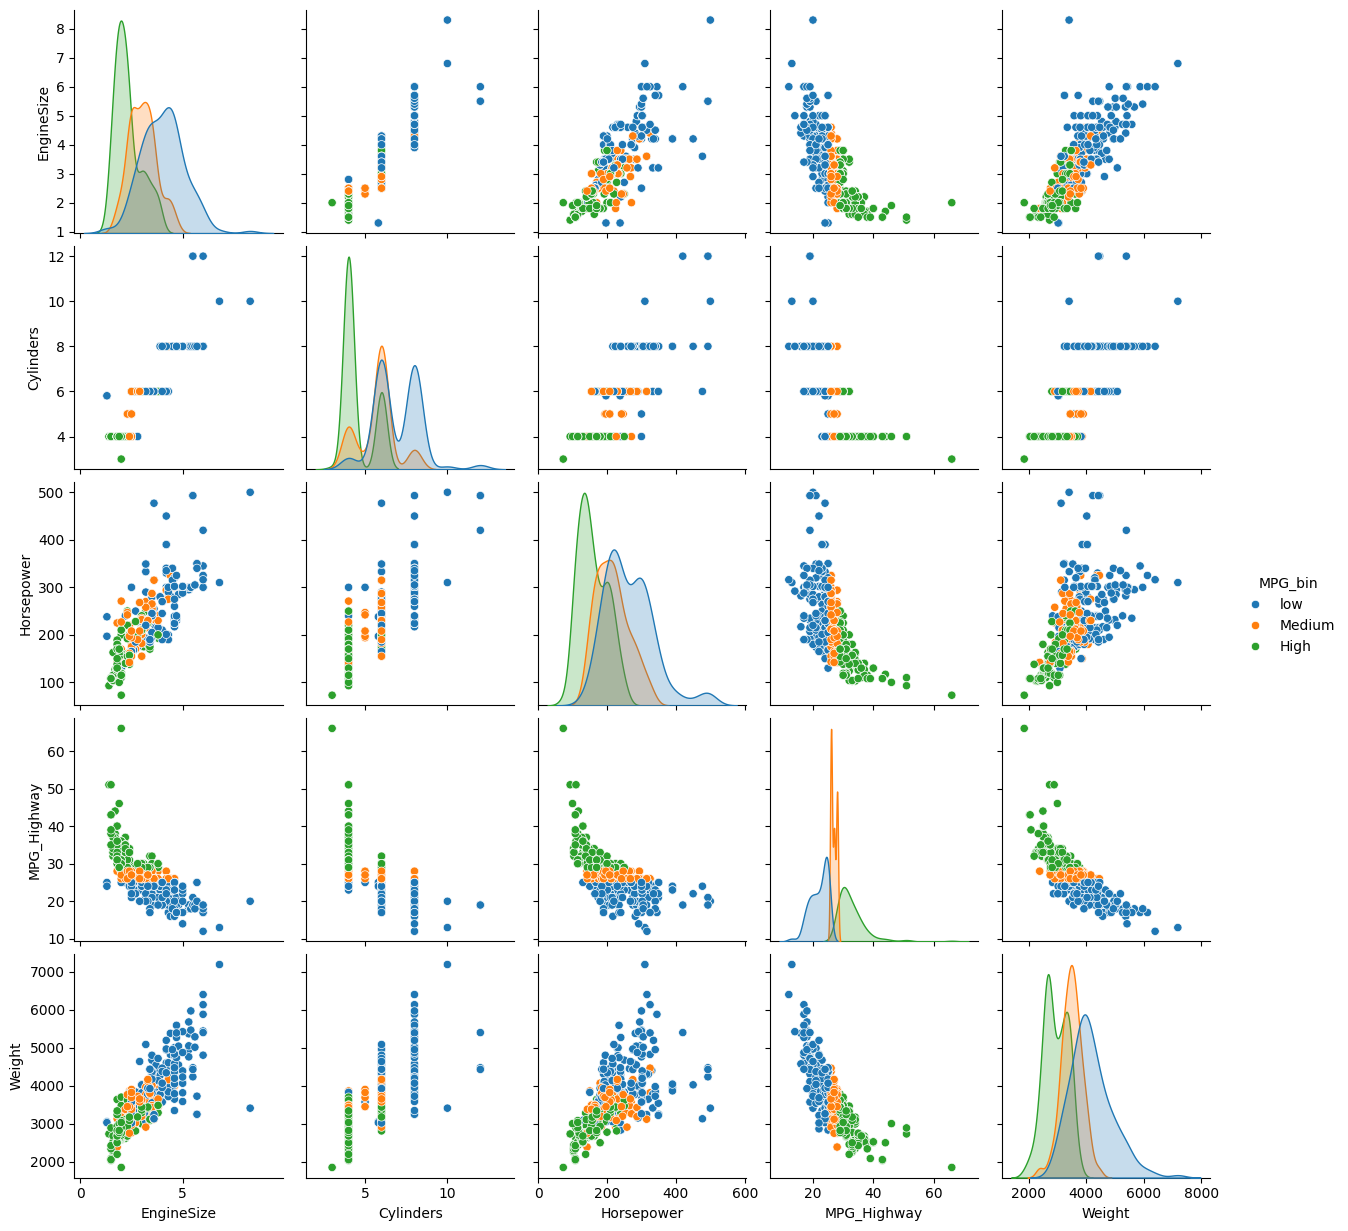

In [76]:
pp_df['MPG_bin']=pd.qcut(pp_df['MPG_Highway'], q=3, labels= ['low', 'Medium', 'High'])
sbs.pairplot(pp_df, hue='MPG_bin')
plt.show()

In [77]:
# Start of Model training and testing

In [78]:
feat = car_df.drop(columns= ["MPG_Highway"]) # assigns all features as features
tar = car_df[["MPG_Highway"]] # assigns target as targets

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(feat, tar, test_size = 0.2, random_state = 42) # Splits the data

In [81]:
from sklearn.preprocessing import StandardScaler # used for scaling data

In [82]:
std_scaler = StandardScaler()

In [101]:
feat_to_scale = ['EngineSize', 'Cylinders', 'Horsepower', 'Weight']

In [84]:
# Scaling started

In [85]:
X_train[feat_to_scale] = std_scaler.fit_transform(X_train[feat_to_scale]) 

In [86]:
X_test[feat_to_scale] = std_scaler.transform(X_test[feat_to_scale])

In [87]:
#To start liner regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
linreg = LinearRegression()

In [104]:
linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
linreg.score(X_train, y_train)

0.6575468832763964

In [106]:
linreg.score(X_test, y_test)

0.6809781108505504

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [94]:
polyfit = PolynomialFeatures(degree=2)


In [95]:
X_train_poly = polyfit.fit_transform(X_train)
X_test_poly = polyfit.fit_transform(X_test)

In [96]:
polyreg = LinearRegression()

In [97]:
polyreg.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
polyreg.score(X_train_poly, y_train)

0.7331250797656339

In [99]:
polyreg.score(X_test_poly, y_test)

0.6999591244363068